In [1]:
'''
# this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment3/'
FOLDERNAME = 'PROJECT/WITHOUT_NOISE_CLEANUP/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# this downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
#%cd /content/drive/My\ Drive/$FOLDERNAME/
#!bash get_datasets.sh

'''











'\n# this mounts your Google Drive to the Colab VM.\nfrom google.colab import drive\ndrive.mount(\'/content/drive\', force_remount=True)\n\n# enter the foldername in your Drive where you have saved the unzipped\n# assignment folder, e.g. \'cs231n/assignments/assignment3/\'\nFOLDERNAME = \'PROJECT/WITHOUT_NOISE_CLEANUP/\'\nassert FOLDERNAME is not None, "[!] Enter the foldername."\n\n# now that we\'ve mounted your Drive, this ensures that\n# the Python interpreter of the Colab VM can load\n# python files from within it.\nimport sys\nsys.path.append(\'/content/drive/My Drive/{}\'.format(FOLDERNAME))\n\n# this downloads the CIFAR-10 dataset to your Drive\n# if it doesn\'t already exist.\n#%cd /content/drive/My\\ Drive/$FOLDERNAME/\n#!bash get_datasets.sh\n\n'

In [2]:
'''
import os 
os.chdir("/content/drive/My Drive/")
os.chdir(FOLDERNAME)
#!bash get_datasets.sh
''' 

'\nimport os \nos.chdir("/content/drive/My Drive/")\nos.chdir(FOLDERNAME)\n#!bash get_datasets.sh\n'

In [3]:
#"neu_3.0_2.0_2.3333_Whole_Length.png".split('_')

In [4]:


#import sys
#!{sys.executable} -m pip install torchsummary


from torch.utils.data import Dataset,DataLoader
from torchvision import transforms
import os
import numpy as np
import time
from PIL import Image
#from PIL import ImageFile
#ImageFile.LOAD_TRUNCATED_IMAGES = True
from collections import defaultdict
import cv2
import pdb
IMG_SIZE = (200,300)

from torchvision import models
from torchsummary import summary
import copy
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#dataset_train.__len__
#dataset_test.shape
#dataset_val.shape

#'''test corrupted images'''
#data_path = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/images_denoised/session1/"
#dataset_train, dataset_test, dataset_val = get_imagenet_datasets(data_path, "cpc")
#
#print(f"Number of train samplest {dataset_train.__len__()}")
#print(f"Number of samples in test split {dataset_test.__len__()}")
#
#BATCH_SIZE = 200
#
#data_loader_train = DataLoader(dataset_train, BATCH_SIZE, shuffle = True)
#data_loader_test = DataLoader(dataset_test, BATCH_SIZE, shuffle = True)
#
#
#import matplotlib.pyplot as plt
#
#fig, axes = plt.subplots(BATCH_SIZE//20,20, figsize=(6,10))
#
#for batch in data_loader_train:
#
#    print(f"Shape of batch['image'] {batch['image'].shape}")
#    print(f"Shape of batch['cls'] {batch['cls'].shape}")
#
#    for i in range(BATCH_SIZE):
#
#        col = i % 20
#        row = i // 20
#
#        img = batch['image'][i].numpy()
#
#        axes[row,col].set_axis_off()
#        #axes[row,col].set_title(batch['class_name'][i])
#        axes[row,col].imshow(np.transpose(img,(1,2,0)))
#
#    plt.show()
#
#    break


In [6]:
#data_path = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/images/session1/"
#data_path = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/combined_session1_2/"
#data_path1 = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/4_EMOTIONS/without_noise_cleanup/session1/"
#data_path2 = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/4_EMOTIONS/without_noise_cleanup/session2/"
#data_path3 = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/4_EMOTIONS/without_noise_cleanup/session3/"
#data_path4 = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/4_EMOTIONS/without_noise_cleanup/session4/"

data_path1 = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/4_EMOTIONS/cb_removed/with_noise_cleanup/session1/"
data_path2 = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/4_EMOTIONS/cb_removed/with_noise_cleanup/session2/"
data_path3 = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/4_EMOTIONS/cb_removed/with_noise_cleanup/session3/"
data_path4 = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/4_EMOTIONS/cb_removed/with_noise_cleanup/session4/"

#img_files = os.listdir("/home/mandeep_stanford/cs231n_project/code/pre-processed_data/images/session1/")
#img_files = os.listdir("/home/mandeep_stanford/cs231n_project/code/pre-processed_data/combined_session1_2/")
#img_files = os.listdir("/home/mandeep_stanford/cs231n_project/code/pre-processed_data/4_EMOTIONS/cb_removed/with_noise_cleanup/session1/")

#pkl_file = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/4_EMOTIONS/without_noise_cleanup/without_noise_cleanup_WHOLE.pkl"

pkl_file = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/4_EMOTIONS/cb_removed/with_noise_cleanup/3sec_time_scale_with_noise_cleaned.pkl"

In [7]:
import pickle
import pdb
X = []
Y = []
i = 0
#extract_emotion = ['hap','sad','ang','neu','fea', 'exc', 'fru']
extract_emotion = ['hap','sad','ang','neu']
if 0:
    path = [data_path1, data_path2, data_path3, data_path4]
    for p_files in path:
        for file_name in os.listdir(p_files):
                    
            print("Working on ", i)
            i = i+1
            #if i >= 7000:
            #    break
            if "Whole" in file_name.split('_'):
              print("")
            else:
              print("Skipping ", file_name)
              continue
            cat = file_name.split('_')[0]
            if cat in extract_emotion:
                #print("")
                if cat == "hap":
                    cat = 0
                if cat == "sad":
                    cat = 1
                if cat == "ang":
                    cat = 2
                if cat == "neu":
                    cat = 3
            else:
                continue
            
            Y.append(cat)
            img = Image.open(p_files+file_name)
            img = img.convert('RGB')
            tr = transforms.Resize((200,300))
            img=tr(img)
            
            trf = transforms.RandomHorizontalFlip(p=1)
            img2 = trf(img)
            #pdb.set_trace()
            tr = transforms.ToTensor()
            
            img1 = tr(img)
            img2 = tr(img2)
            
            img1 = np.array(img1)
            img2 = np.array(img2)
            if cat == "hap":
                Y.append(cat)
                X.append(img1)
                Y.append(cat)
                X.append(img1)
                Y.append(cat)
                X.append(img1)
                Y.append(cat)
                X.append(img1)
                Y.append(cat)
                X.append(img1)
                Y.append(cat)
                X.append(img2)
                
            if cat == "ang":
                Y.append(cat)
                X.append(img1)
                Y.append(cat)
                X.append(img1)
            #X=np.vstack((X,img1))
            X.append(img1)
            Y.append(cat)
            X.append(img2)
    
            del img1
            del img2
            del img
            del tr

    Y = np.asarray(Y)
    X = np.asarray(X)
    data = {}
    data["X"] = X
    data["Y"] = Y
    with open(pkl_file, 'wb') as f:
        pickle.dump(data, f)
        f.close()

    
    
    
    
    




In [8]:
import pickle
import torch
assert '.'.join(torch.__version__.split('.')[:2]) == '1.4'
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torch.utils.data as data_utils
import torchvision.datasets as dset
import torchvision.transforms as T
import torch.nn.functional as F 
import numpy as np
#pkl_file = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/images_denoised/session1_pkl_tensor1.pkl"
data = pickle.load(open(pkl_file, 'rb'))
X = data["X"]
Y = data["Y"]

In [9]:
X.shape

(5010, 3, 200, 300)

In [10]:
np.unique(Y)

array([0, 1, 2, 3])

In [11]:

import numpy as np
total_images = X.shape[0]
test_data_images = np.int(total_images*0.2)
train_data_images = total_images - test_data_images
#X_train = X[0:train_data_images,-1]
#y_train = Y[0:train_data_images]
#X_test = X[train_data_images:train_data_images+test_data_images, -1]
#y_test= Y[train_data_images:train_data_images+test_data_images]

#X_train = np.asarray(X_train)
#X_test = np.asarray(X_test)
#y_train = np.asarray(y_train)
#y_test = np.asarray(y_test)

#y_train = y_train.reshape((y_train[0]))
#y_test = y_test.reshape((y_test[0]))
#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#print(y_test.shape)

In [12]:



USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)

using device: cuda


In [13]:
train_data = []
keys_array = np.unique(Y)
for i in range(len(X)):
   ind = np.where(keys_array==Y[i]) 
   train_data.append([X[i], Y[i]])
print("DONE")
#dataset = data_utils.TensorDataset(train_data, batch_size=100)
print(train_data_images)
print(train_data_images+test_data_images)
loader_train = DataLoader(train_data, batch_size=64, 
                          sampler=sampler.SubsetRandomSampler(range(0,train_data_images)))

loader_val = DataLoader(train_data, batch_size=64, 
                        sampler=sampler.SubsetRandomSampler(range(train_data_images, train_data_images+test_data_images)))


#for t, (x,y) in enumerate(loader_train):
#  print(t, x, y)

DONE
4008
5010


In [14]:
print_every = 1

In [15]:
def check_train_accuracy(loader, model):
    #if loader.dataset.train:
    #    print('Checking accuracy on validation set')
    #else:
    #    print('Checking accuracy on test set')
    print('Checking accuracy on TRAIN set')
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            #pdb.set_trace()
            #y = torch.stack(y) #.to(device=device)
            #y = y.reshape((x.shape[0]))
            scores = model(x)
            _, preds = scores.max(1)
            
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
        return acc

In [16]:
def check_accuracy_part34(loader, model):
    #if loader.dataset.train:
    #    print('Checking accuracy on validation set')
    #else:
    #    print('Checking accuracy on test set')
    print('Checking accuracy on VAL set')
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            #pdb.set_trace()
            #y = torch.stack(y) #.to(device=device)
            #y = y.reshape((x.shape[0]))
            scores = model(x)
            _, preds = scores.max(1)
            
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
        return acc

In [17]:
def train_part34(model, optimizer, epochs=1):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    acc = 0
    per_epoch_train_accuracy_list = []
    per_epoch_test_accuracy_list = []
    train_accuracy_list = []
    test_accuracy_list = []
    loss_list = []
    best_model = model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, (x, y) in enumerate(loader_train):
            import pdb
            #pdb.set_trace()
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            #y = torch.stack(y) #.to(device=device)
            #y = y.reshape((x.shape[0]))
            scores = model(x)
            
            loss = F.cross_entropy(scores, y)
            loss_list.append(loss.item())
            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()
            #pdb.set_trace()
            #print("IN ITERATION", t)
            if t % print_every == 0:
                print('Epoch %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
                #pdb.set_trace()
                xx = x.cpu().data.numpy()
                yy = y.cpu().data.numpy()
                tt_data = []
                for i in range(len(xx)):
                  ind = np.where(keys_array==Y[i]) 
                  tt_data.append([xx[i], yy[i]])
                
                train_d = DataLoader(tt_data, batch_size = 1)
                
                train_acc = check_train_accuracy(train_d, model)
                train_accuracy_list.append(train_acc)
                test_acc = check_accuracy_part34(loader_val, model)
                test_accuracy_list.append(test_acc)
                if test_acc > acc:
                  acc = test_acc
                  best_model = copy.deepcopy(model)
                print()
        
        e_test_accuracy = check_accuracy_part34(loader_val, model)        
        per_epoch_test_accuracy_list.append(e_test_accuracy)     
        e_train_accuracy = check_train_accuracy(loader_train, model)        
        per_epoch_train_accuracy_list.append(e_train_accuracy)     
    return best_model, acc, train_accuracy_list, test_accuracy_list, per_epoch_train_accuracy_list, per_epoch_test_accuracy_list, loss_list 

In [18]:
class Flatten(nn.Module):
    def flatten(x):
        N = x.shape[0] # read in N, C, H, W
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image

    def forward(self, x):
        N = x.shape[0]
        return x.view(N, -1)

class LSTM(nn.Module):
    def __init__(self):
        super().__init__()
        #self.model = nn.LSTM(input_size=(32*25*37),hidden_size=128,num_layers=2,batch_first=True,bidirectional =True, dropout=0.1)
        self.model = nn.RNN(input_size=(32*25*37),hidden_size=128,num_layers=2,batch_first=True,bidirectional =True, dropout=0.1)
    def forward(self, x):

        # From [batches, seqs, seq len, features]
        # to [seq len, batch data, features]
        x = x.unsqueeze(1)
       
        # Data is fed to the LSTM
        out, _ = self.model(x)

        # From [seq len, batch, num_directions * hidden_size]
        # to [batches, seqs, seq_len,prediction]
        out = out.squeeze(1)


        return out

#hidden_layer_size = 500
#learning_rate = 1e-2

#model = nn.Sequential(
#    Flatten(),
#    nn.Linear(3 * 200 * 300, hidden_layer_size),
#    nn.ReLU(),
#    nn.Linear(hidden_layer_size, keys_array.shape[0]),
#)


l1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=(12,16), padding=(6,8), stride=1),
            nn.ReLU(),
            #nn.Conv2d(channel_1, channel_1, kernel_size=5, padding=2, stride=1),
            nn.MaxPool2d(2, 2)
)

#for t, (x, y) in enumerate(loader_train):
#            # put model to training mode
#            x = x.to(device=device, dtype=dtype)
#            import pdb
#            pdb.set_trace()
#            break
    
#pdb.set_trace()
#h = l1(x)
#h.shape

l2 = nn.Sequential(
            nn.Conv2d(16, 24, kernel_size=(8,12), padding=(4,6), stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
)
#h = l2(h)

l3 = nn.Sequential(
            nn.Conv2d(24, 32, kernel_size=(5,7), padding=(2,3), stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            Flatten(),
            LSTM()
            
)

#l4 = nn.Sequential(
#            nn.Conv2d(channel_3, channel_4, kernel_size=3, padding=1, stride=1),
#            nn.MaxPool2d(2, 1)
#)

#import pdb
#pdb.set_trace()
hidden_layer_size = keys_array.shape[0]
learning_rate = 1e-4 #1e-4   1e-3 looks gud
model = nn.Sequential(
            l1,
            l2,
            l3,
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(64, keys_array.shape[0])
)




# you can use Nesterov momentum in optim.SGD
#optimizer = optim.Adam(model.parameters(), lr=learning_rate,momentum=0.9, nesterov=True)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, 
                     betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False) #weight_decay = 0 luks gud. Trying with 0.1


#best_model, best_test_acc, train_accuracy_list, test_accuracy_list, loss_list = train_part34(model, optimizer, 2)
best_model, best_test_acc, train_accuracy_list, test_accuracy_list, per_epoch_train_accuracy_list, per_epoch_test_accuracy_list, loss_list = train_part34(model, optimizer, 50)
print("DONE TRAINING")


Epoch 0, Iteration 0, loss = 1.4012
Checking accuracy on TRAIN set
Got 19 / 64 correct (29.69)
Checking accuracy on VAL set
Got 264 / 1002 correct (26.35)

Epoch 0, Iteration 1, loss = 1.3658
Checking accuracy on TRAIN set
Got 21 / 64 correct (32.81)
Checking accuracy on VAL set
Got 264 / 1002 correct (26.35)

Epoch 0, Iteration 2, loss = 1.3648
Checking accuracy on TRAIN set
Got 18 / 64 correct (28.12)
Checking accuracy on VAL set
Got 246 / 1002 correct (24.55)

Epoch 0, Iteration 3, loss = 1.3741
Checking accuracy on TRAIN set
Got 22 / 64 correct (34.38)
Checking accuracy on VAL set
Got 322 / 1002 correct (32.14)

Epoch 0, Iteration 4, loss = 1.3635
Checking accuracy on TRAIN set
Got 21 / 64 correct (32.81)
Checking accuracy on VAL set
Got 322 / 1002 correct (32.14)

Epoch 0, Iteration 5, loss = 1.3208
Checking accuracy on TRAIN set
Got 26 / 64 correct (40.62)
Checking accuracy on VAL set
Got 322 / 1002 correct (32.14)

Epoch 0, Iteration 6, loss = 1.2935
Checking accuracy on TRAIN s

In [19]:
torch.save(best_model, "best_model_RNN_without_noise_cleanup_whole_time_scale_50_epochs")
torch.save(model, "model_RNN_without_noise_cleanup_whole_time_scale_50_epochs")

/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Flatten. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type LSTM. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [20]:
print("DONE")
per_epoch_train_accuracy_list

DONE


[0.48278443113772457,
 0.4865269461077844,
 0.47305389221556887,
 0.47904191616766467,
 0.5012475049900199,
 0.5,
 0.5014970059880239,
 0.5077345309381237,
 0.5004990019960079,
 0.5082335329341318,
 0.5099800399201597,
 0.5119760479041916,
 0.5167165668662674,
 0.5152195608782435,
 0.5147205588822356,
 0.5157185628742516,
 0.5182135728542914,
 0.5229540918163673,
 0.5227045908183633,
 0.5207085828343313,
 0.5234530938123753,
 0.5172155688622755,
 0.531187624750499,
 0.5237025948103793,
 0.5142215568862275,
 0.531686626746507,
 0.534181636726547,
 0.5326846307385229,
 0.5474051896207585,
 0.5518962075848304,
 0.5543912175648703,
 0.5651197604790419,
 0.5533932135728543,
 0.5683632734530938,
 0.5596307385229541,
 0.5778443113772455,
 0.5863273453093812,
 0.5948103792415169,
 0.6112774451097804,
 0.627744510978044,
 0.6417165668662674,
 0.6464570858283433,
 0.6639221556886228,
 0.6858782435129741,
 0.7018463073852296,
 0.7095808383233533,
 0.7230538922155688,
 0.7103293413173652,
 0.75124

No handles with labels found to put in legend.


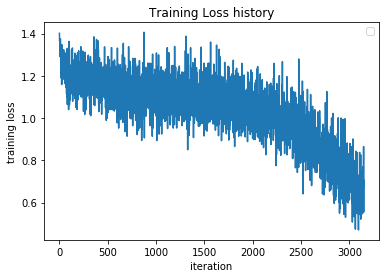

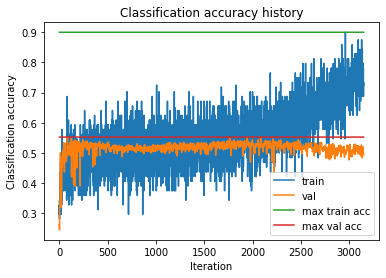

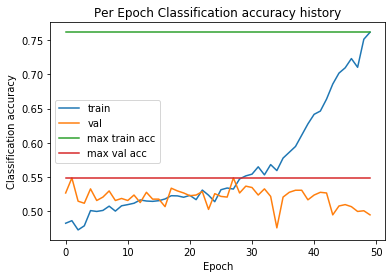

In [21]:
##PLOT LOSS, TRAIN ACCURACY, TEST ACCURACY
import matplotlib.pyplot as plt
max_train_accuracy = np.repeat(np.max(np.array([train_accuracy_list])),   len(train_accuracy_list))

max_test_accuracy = np.repeat(np.max(np.array([test_accuracy_list])),   len(test_accuracy_list))

max_p_e_train_accuracy = np.repeat(np.max(np.array([per_epoch_train_accuracy_list])),   len(per_epoch_train_accuracy_list))

max_p_e_test_accuracy = np.repeat(np.max(np.array([per_epoch_test_accuracy_list])),   len(per_epoch_test_accuracy_list))

# plot the loss history
plt.subplot()
plt.plot(loss_list)
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.legend()
plt.show()

plt.subplot()
plt.plot(train_accuracy_list, label='train')
plt.plot(test_accuracy_list, label='val')
plt.plot(max_train_accuracy, label='max train acc')
plt.plot(max_test_accuracy, label='max val acc')
plt.title('Classification accuracy history')
plt.xlabel('Iteration')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

plt.subplot()
plt.plot(per_epoch_train_accuracy_list, label='train')
plt.plot(per_epoch_test_accuracy_list, label='val')
plt.plot(max_p_e_train_accuracy, label='max train acc')
plt.plot(max_p_e_test_accuracy, label='max val acc')
plt.title('Per Epoch Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()



In [22]:


from sklearn.metrics import confusion_matrix
#from resources.plotcm import plot_confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    #plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
def check_train_accuracy1(loader, model, for_confusion_matrix=0):
    #if loader.dataset.train:
    #    print('Checking accuracy on validation set')
    #else:
    #    print('Checking accuracy on test set')
    print('Checking accuracy on TRAIN set')
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    true_label_list = []
    predicted_label_list = []
    with torch.no_grad():
        for x, y in loader:
            true_label_list.append(y.cpu().data.numpy())
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            #pdb.set_trace()
            #y = torch.stack(y) #.to(device=device)
            #y = y.reshape((x.shape[0]))
            scores = model(x)
            _, preds = scores.max(1)
            predicted_label_list.append(preds.cpu().data.numpy())            
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
        if for_confusion_matrix == 1:
          return acc, true_label_list, predicted_label_list
        else:
          return acc

Checking accuracy on TRAIN set


/opt/conda/conda-bld/pytorch_1579022060824/work/aten/src/ATen/native/cudnn/RNN.cpp:1266: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters().
/opt/conda/conda-bld/pytorch_1579022060824/work/aten/src/ATen/native/cudnn/RNN.cpp:1266: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters().
/opt/conda/conda-bld/pytorch_1579022060824/work/aten/src/ATen/native/cudnn/RNN.cpp:1266: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters().
/opt/conda/conda-bld/pytorch_1579022060824/wor

Got 1946 / 4008 correct (48.55)
Confusion matrix, without normalization
[[  0 227 219 182]
 [  0 853  86 371]
 [  0  78 581 209]
 [  0 471 219 512]]


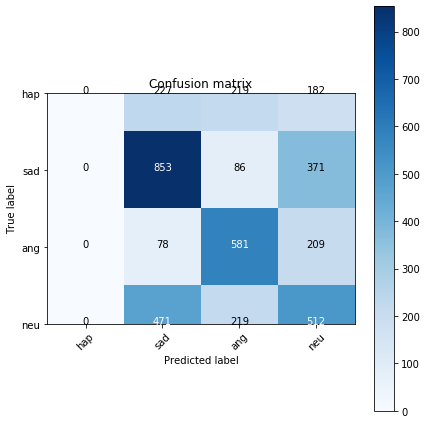

In [24]:
#best_model1 = torch.load("model2")
accuracy, true_label, predicted_label = check_train_accuracy1(loader_train, best_model, for_confusion_matrix=1)
true_label = np.concatenate(true_label, axis=None)
#print(true_label)

predicted_label = np.concatenate(predicted_label, axis=None)
#print(predicted_label)

emotion_dict = ('hap',
                'sad',
                'ang',
                'neu'
                )
cm = confusion_matrix(true_label, predicted_label)

#t_t = train_set_targets.cpu().data.numpy()
#predict = preds.cpu().data.numpy()
#t_t = 1 + t_t
#predict = 1 + predict

#for i in range(t_t.shape[0]):
#  print(t_t[i], predict[i])
#print(t_t)
#print(predict)
#print(cm)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cm, emotion_dict)

Checking accuracy on TRAIN set


/opt/conda/conda-bld/pytorch_1579022060824/work/aten/src/ATen/native/cudnn/RNN.cpp:1266: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters().
/opt/conda/conda-bld/pytorch_1579022060824/work/aten/src/ATen/native/cudnn/RNN.cpp:1266: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters().
/opt/conda/conda-bld/pytorch_1579022060824/work/aten/src/ATen/native/cudnn/RNN.cpp:1266: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters().
/opt/conda/conda-bld/pytorch_1579022060824/wor

Got 554 / 1002 correct (55.29)
Confusion matrix, without normalization
[[  0  41  42  51]
 [  0 229  12  81]
 [  0  19 195  68]
 [  0  73  61 130]]


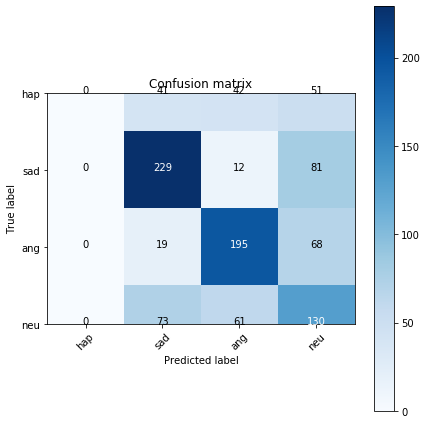

In [25]:
#best_model1 = torch.load("model1")
accuracy, true_label, predicted_label = check_train_accuracy1(loader_val, best_model, for_confusion_matrix=1)
true_label = np.concatenate(true_label, axis=None)
#print(true_label)

predicted_label = np.concatenate(predicted_label, axis=None)
#print(predicted_label)


cm = confusion_matrix(true_label, predicted_label)

#t_t = train_set_targets.cpu().data.numpy()
#predict = preds.cpu().data.numpy()
#t_t = 1 + t_t
#predict = 1 + predict

#for i in range(t_t.shape[0]):
#  print(t_t[i], predict[i])
#print(t_t)
#print(predict)
#print(cm)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cm, emotion_dict)

Checking accuracy on TRAIN set
Got 3052 / 4008 correct (76.15)
Confusion matrix, without normalization
[[ 411  198    1   18]
 [  53 1157    2   98]
 [  16   54  779   19]
 [  57  439    1  705]]


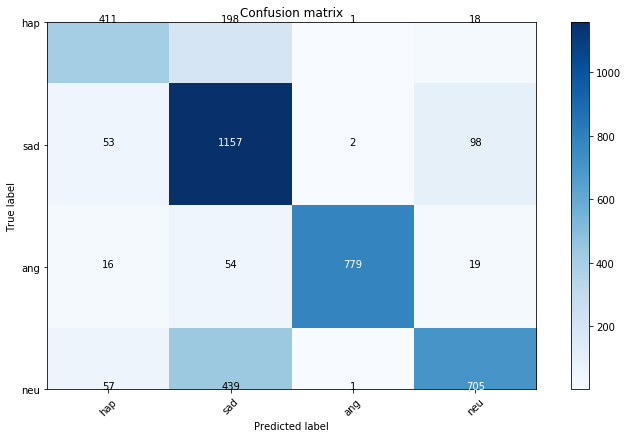

In [26]:
accuracy, true_label, predicted_label = check_train_accuracy1(loader_train, model, for_confusion_matrix=1)
true_label = np.concatenate(true_label, axis=None)
#print(true_label)

predicted_label = np.concatenate(predicted_label, axis=None)
#print(predicted_label)

emotion_dict = ('hap',
                'sad',
                'ang',
                'neu'
                )
cm = confusion_matrix(true_label, predicted_label)

#t_t = train_set_targets.cpu().data.numpy()
#predict = preds.cpu().data.numpy()
#t_t = 1 + t_t
#predict = 1 + predict

#for i in range(t_t.shape[0]):
#  print(t_t[i], predict[i])
#print(t_t)
#print(predict)
#print(cm)
plt.figure(figsize=(10,6))
plot_confusion_matrix(cm, emotion_dict)

In [ ]:
#best_model1 = torch.load("model1")
accuracy, true_label, predicted_label = check_train_accuracy1(loader_val, model, for_confusion_matrix=1)
true_label = np.concatenate(true_label, axis=None)
#print(true_label)

predicted_label = np.concatenate(predicted_label, axis=None)
#print(predicted_label)


cm = confusion_matrix(true_label, predicted_label)

#t_t = train_set_targets.cpu().data.numpy()
#predict = preds.cpu().data.numpy()
#t_t = 1 + t_t
#predict = 1 + predict

#for i in range(t_t.shape[0]):
#  print(t_t[i], predict[i])
#print(t_t)
#print(predict)
#print(cm)
plt.figure(figsize=(6,10))
plot_confusion_matrix(cm, emotion_dict)

Checking accuracy on TRAIN set
